In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the datasets
test = pd.read_csv("test.csv")
df = pd.read_csv("train.csv")
train=pd.concat([df,test],ignore_index=True,sort=False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
total=train.isnull().sum().sort_values(ascending=False)
p=(train.isnull().sum()/train.isnull().count())*100
p1=(round(p,1)).sort_values(ascending=False)
missing_data=pd.concat([total,p1],axis=1,keys=['total','%'])
missing_data

,total,%
Cabin,1014,77.5
Survived,418,31.9
Age,263,20.1
Embarked,2,0.2
Fare,1,0.1
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0


# Explore the data who are the passengers

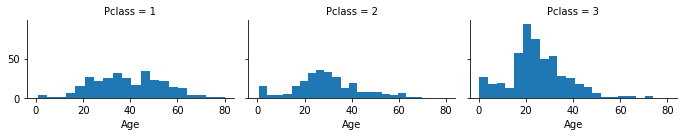

In [5]:
g=sns.FacetGrid(train,col='Pclass',height=2,aspect=1.6)
g = g.map(plt.hist, "Age",bins=20)

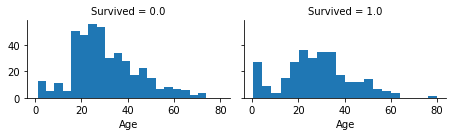

In [6]:
g=sns.FacetGrid(train,col='Survived',height=2,aspect=1.6)
g = g.map(plt.hist, "Age",bins=20)

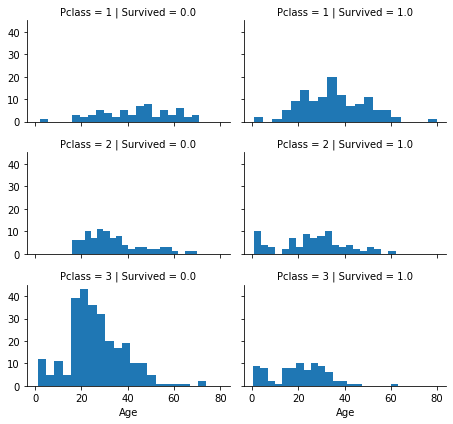

In [7]:
g=sns.FacetGrid(train,col='Survived',row='Pclass',height=2,aspect=1.6)
g = g.map(plt.hist, "Age",bins=20)

Observations: Most of the passengers between the age 20 to 40 from class=3 have not surived
              Most of the passengers between the age 20 to 40 from class=1 have survived

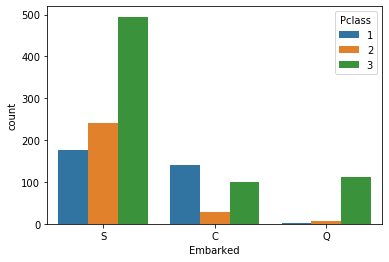

In [8]:
a=sns.countplot(x='Embarked',data=train,hue='Pclass')

#To find the Chances of Survival

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


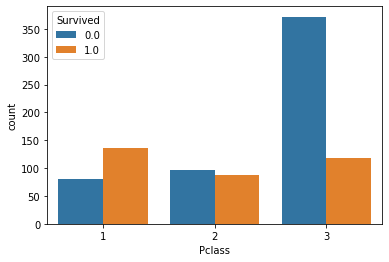

In [9]:
d=train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()
print(d)
a=sns.countplot(x='Pclass',data=train,hue='Survived')

      Sex  Survived
0  female  0.742038
1    male  0.188908


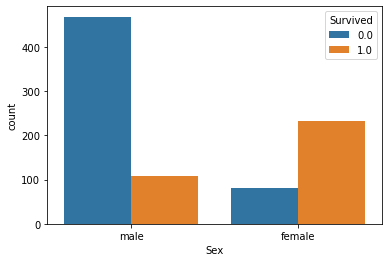

In [9]:
d=train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)
print(d)
sns.countplot(x='Sex',data=train,hue='Survived')

In [10]:
train['Sex']=train['Sex'].map({'female':1,'male':0}).astype(int)

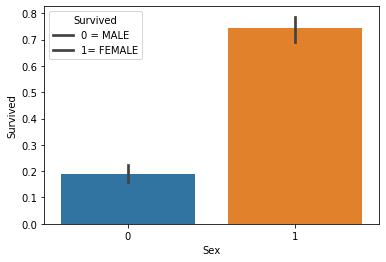

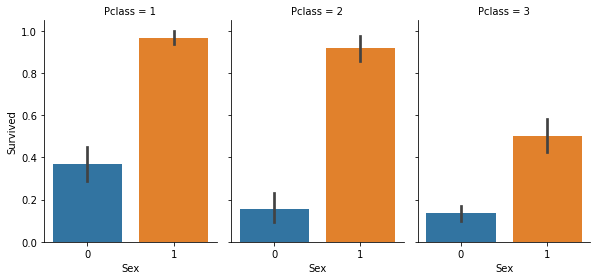

In [11]:
sns.barplot(x="Sex", y="Survived", data=train)
plt.legend(title='Survived', loc='upper left', labels=['0 = MALE', '1= FEMALE'])
sns.catplot(x="Sex", y="Survived", data=train, col="Pclass", kind="bar",height=4, aspect=.7)

In [12]:
corr=train.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1,-0.00500666,-0.0383544,-0.0134057,0.0288145,-0.055224,0.00894208,0.0314285
Survived,-0.00500666,1,-0.338481,0.543351,-0.0772211,-0.0353225,0.0816294,0.257307
Pclass,-0.0383544,-0.338481,1,-0.124617,-0.408106,0.060832,0.0183222,-0.558629
Sex,-0.0134057,0.543351,-0.124617,1,-0.0636449,0.109609,0.213125,0.185523
Age,0.0288145,-0.0772211,-0.408106,-0.0636449,1,-0.243699,-0.150917,0.17874
SibSp,-0.055224,-0.0353225,0.060832,0.109609,-0.243699,1,0.373587,0.160238
Parch,0.00894208,0.0816294,0.0183222,0.213125,-0.150917,0.373587,1,0.221539
Fare,0.0314285,0.257307,-0.558629,0.185523,0.17874,0.160238,0.221539,1


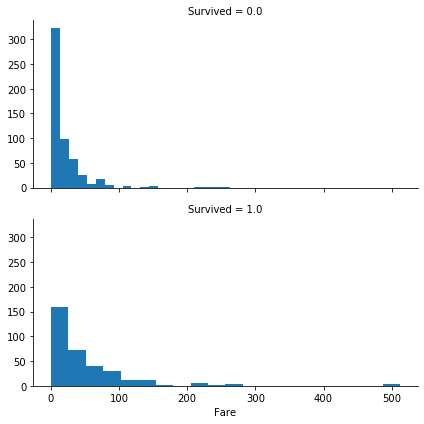

In [13]:
g=sns.FacetGrid(train,row='Survived',height=3, aspect=2)
g=g.map(plt.hist,'Fare',bins=20)

To check how the family members affect the Survival

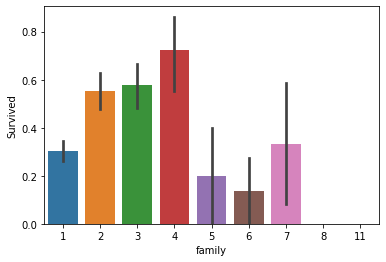

In [14]:
train['family']=train['SibSp']+train['Parch']+1
train['alone']=train['family'].apply(lambda x:0 if x>1 else 1)
sns.barplot(x='family',y='Survived',data=train)


       Survived
alone          
0      0.505650
1      0.303538


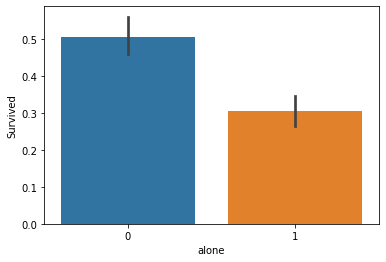

In [15]:
a=train[['alone','Survived']].groupby(['alone']).mean()
print(a)
sns.barplot(x='alone',y='Survived',data=train)

To check whether the Title has anywhere related to the survival

In [16]:
train['title']=train['Name'].str.extract('([A-Za-z]+)\.',expand=False)
train['title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Capt          1
Dona          1
Sir           1
Countess      1
Mme           1
Jonkheer      1
Don           1
Lady          1
Name: title, dtype: int64

Mr        759
Miss      260
Mrs       197
Master     61
rare       32
Name: title, dtype: int64


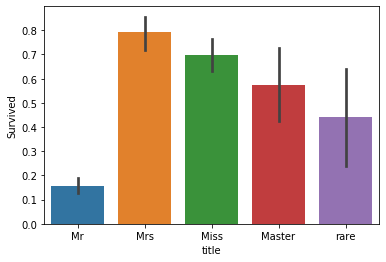

In [17]:
def grp(val):
    if val in ['Rev','Major','Col','Mlle','Jonkheer','Dona','Capt','Ms','Mme','Lady','Countess','Dr']:
        return 'rare'
    elif val in['Sir','Don']:
        return 'Mr'
    elif val in ['Lady','Dona']:
        return 'Mrs'
    else:
        return val
    
train['title']=train['title'].apply(grp)
print(train['title'].value_counts())
a=sns.barplot(x='title',y='Survived',data=train)   

To find the age using Pclass,Sex,title

Sex  Pclass  title 
0    1       Master     6.98
             Mr        41.50
             rare      50.00
     2       Master     2.76
             Mr        32.35
             rare      40.70
     3       Master     6.09
             Mr        28.32
1    1       Miss      30.34
             Mrs       43.21
             rare      34.43
     2       Miss      20.72
             Mrs       33.52
             rare      28.00
     3       Miss      17.36
             Mrs       32.33
             rare        NaN
Name: Age, dtype: float64


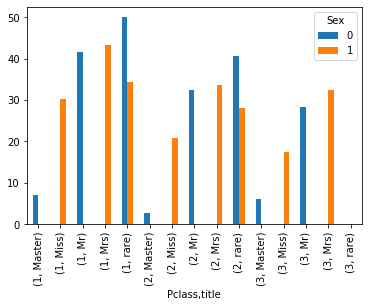

In [18]:
a=train.groupby(['Sex','Pclass','title']).mean().round(2)
a=a['Age']
print(a)
a.unstack(level=0).plot(kind='bar',subplots=False)

In [19]:
b=train.iloc[:891].groupby(['Sex','Pclass','title'])
b_median=b.median()
b=b_median.reset_index()[['Sex', 'Pclass', 'title', 'Age']]
b

,Sex,Pclass,title,Age
0,0,1,Master,4.0
1,0,1,Mr,40.0
2,0,1,rare,50.0
3,0,2,Master,1.0
4,0,2,Mr,31.0
5,0,2,rare,46.5
6,0,3,Master,4.0
7,0,3,Mr,26.0
8,1,1,Miss,30.0
9,1,1,Mrs,41.5


In [20]:
for key,values in train['Age'].iteritems():
    if pd.isna(train['Age'][key]):
        for key2,values2 in b['Age'].iteritems():
            if train['Sex'][key]==b['Sex'][key2]and train['title'][key]==b['title'][key2] and train['Pclass'][key]==b['Pclass'][key2]:
                train['Age'][key]=b['Age'][key2]
            else:
                train['Age'][key] = train['Age'][key]
train['Age']         

<ipython-input-20-76791e330d3e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][key] = train['Age'][key]
<ipython-input-20-76791e330d3e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][key]=b['Age'][key2]


0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    26.0
1305    39.0
1306    38.5
1307    26.0
1308     4.0
Name: Age, Length: 1309, dtype: float64

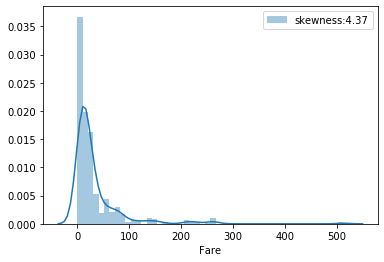

In [21]:
g=sns.distplot(train['Fare'],label="skewness:%.2f"%(train['Fare'].skew()))
g=g.legend(loc='best')

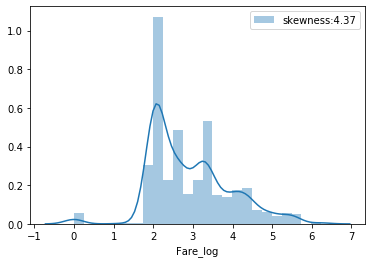

In [22]:
train['Fare_log']=train['Fare'].apply(lambda i: np.log(i) if i>0 else 0)
g=sns.distplot(train['Fare_log'],label="skewness:%.2f"%(train['Fare'].skew()))
g=g.legend(loc='best')

In [24]:
def group_fare(fare):
    if fare < 100:
        return fare
    else:
        return 100

train['Fare_limited'] = train['Fare'].apply(group_fare)

In [27]:
train['has_cabin'] = 0

for Key, value in train['Cabin'].iteritems(): 
    if pd.isna(train['Cabin'][Key]):
        train['has_cabin'][Key] = int(0)
    else:
        train['has_cabin'][Key] = int(1)

<ipython-input-27-a0f0c3c01f40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['has_cabin'][Key] = int(0)
<ipython-input-27-a0f0c3c01f40>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['has_cabin'][Key] = int(1)


Pre-Modeling

In [25]:
# to fill the null values

train['Embarked'].fillna("S",inplace=True)
train['Age'].fillna(train['Age'].mean(),inplace=True)

# To covert the catagorial values to numerical values

le=preprocessing.LabelEncoder()
train['Embarked'] = le.fit_transform(train['Embarked'])
train['Sex'] = le.fit_transform(train['Sex'])
train['title'] = le.fit_transform(train['title'])


In [26]:
train_df = train[0:891]
test_df = train[-418::]
corr = train_df.corr().round(2)
corr['Survived'].sort_values()

Pclass         -0.34
alone          -0.20
Embarked       -0.17
Age            -0.06
title          -0.05
SibSp          -0.04
PassengerId    -0.01
family          0.02
Parch           0.08
Fare            0.26
Fare_limited    0.32
Fare_log        0.33
Fare_log2       0.33
Sex             0.54
Survived        1.00
Name: Survived, dtype: float64

In [60]:
train_X = train_df[['Sex','Age','Pclass','Fare_limited','alone','family','title']]
train_Y = train_df['Survived']
predict_X = test_df[['Sex','Age','Pclass','Fare_limited','alone','family','title']]


To compare classifiers and choose the best one

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [32]:
classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=8, test_size=0.5, random_state=1)

x = train_X.values
y = train_Y.values

acc_dict = {}

for train_index, test_index in sss.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        acc = accuracy_score(y_test, predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

log.sort_values('Accuracy', ascending=False)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

,Classifier,Accuracy
0,GradientBoostingClassifier,0.657175
0,RandomForestClassifier,0.655157
0,AdaBoostClassifier,0.646188
0,LinearDiscriminantAnalysis,0.641031
0,LogisticRegression,0.641031
0,QuadraticDiscriminantAnalysis,0.641031
0,GaussianNB,0.628251
0,DecisionTreeClassifier,0.620852
0,KNeighborsClassifier,0.559641
0,SVC,0.545291


To train the data with random forest

In [33]:
train_data,test_data,train_tar,test_tar=train_test_split(train_X,train_Y,test_size=0.4,random_state=0)
train_data.shape,test_data.shape

((534, 7), (357, 7))

In [36]:
model = RandomForestClassifier(n_estimators=1000,min_samples_split=8, min_samples_leaf=4)
model.fit(train_data, train_tar)
predictions = model.predict(test_data)
accuracy_score(test_tar, predictions)

0.8235294117647058

In [38]:
from sklearn.metrics import plot_roc_curve, mean_absolute_error, r2_score, mean_squared_error

rmse = np.sqrt(mean_squared_error(test_tar,predictions))
print("RMSE:" +str(rmse))
print("MAE: " + str(mean_absolute_error(test_tar,predictions)))
print("R2:" + str(r2_score(test_tar,predictions)))

RMSE:0.42008402520840293
MAE: 0.17647058823529413
R2:0.2516968325791854


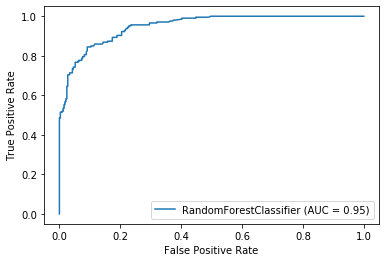

In [40]:
svc_disp = plot_roc_curve(model, train_data, train_tar)
plt.show()

In [41]:
def algorithm_pipeline(x_train_data, x_test_data, y_train_data, y_test_data,model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(x_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(x_test_data)
    else:
      pred = fitted_model.predict(x_test_data)
    
    return fitted_model, pred

In [42]:
model = RandomForestClassifier()

# Various hyper-parameters to tune
parameters = {
              'min_samples_split': [4,8],
              'min_samples_leaf': [2,4,8],
              'criterion': ['gini', 'entropy'],
              'n_estimators': [100]}

model, pred = algorithm_pipeline(train_data, test_data, train_tar, test_tar, model,parameters, cv=5)

print(model.best_params_)
rmse = np.sqrt(-model.best_score_)
print("RMSE: %f" % (rmse))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.7s finished


{'criterion': 'entropy', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}
RMSE: 0.410409


To Train the model with GradientBoostingClassifier

In [57]:
model = GradientBoostingClassifier(learning_rate=0.005,n_estimators=1000, min_samples_split=2, min_samples_leaf=2)
model.fit(train_data, train_tar)
pred = model.predict(test_data)
accuracy_score(test_tar,pred)

0.8403361344537815

In [58]:
from sklearn.metrics import plot_roc_curve, mean_absolute_error, r2_score, mean_squared_error

rmse = np.sqrt(mean_squared_error(test_tar,pred))
print("RMSE:" +str(rmse))
print("MAE: " + str(mean_absolute_error(test_tar,pred)))
print("R2:" + str(r2_score(test_tar,pred)))

RMSE:0.39957961102415934
MAE: 0.15966386554621848
R2:0.3229638009049772


In [59]:
model = GradientBoostingClassifier()

# Various hyper-parameters to tune
parameters = {'learning_rate':[0.005,0.05,0.5],
              'min_samples_split': [4,8],
              'min_samples_leaf': [2,4,8],
              'n_estimators': [100]}

model, pred = algorithm_pipeline(train_data, test_data, train_tar, test_tar, model,parameters, cv=5)

print(model.best_params_)
rmse = np.sqrt(-model.best_score_)
print("RMSE: %f" % (rmse))


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.1s finished


{'learning_rate': 0.05, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
RMSE: 0.401263


In [62]:
predict_Y = model.predict(predict_X)